In [1]:
# Titanic Project

In [2]:
# Import Libraries 

In [60]:
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats 
from sklearn import linear_model
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline


In [3]:
def outliers(df, dt):
    sorted(df[dt])
    Q1 = df[dt].quantile(0.25)
    Q3 = df[dt].quantile(0.75)
    IQR = Q3 - Q1
    print("Column:", dt)
    print("Old Shape", df.shape)
    upper_val = (Q3 + (1.5 * IQR))
    lower_val = Q1 - (1.5 * IQR)
    count = len(df[(df[dt] > upper_val) | (df[dt] < lower_val)])
    df.drop(df[(df[dt] > upper_val) | (df[dt] < lower_val)].index, inplace=True)
    print("New Shape", df.shape)
    print("Count of Item Removed:", count)
    print("Outliers ratio:", count / len(df[dt]))


def null_values(df):
    null_value = df.isnull().sum().sort_values(ascending=False)
    percent_1 = df.isnull().sum() / df.isnull().count() * 100
    percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([null_value, percent_2], axis=1, keys=['Total', '%'])
    print(missing_data)


In [4]:
train_data = pd.read_csv("dataset/titanic_train.csv")
test_data = pd.read_csv("dataset/titanic_test.csv")

In [5]:
# display first 5 row in train data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# display description of train data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# display information about train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# display first 5 row in test data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# display description of test data
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
# display information about test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
# check for the null train_data
null_values(train_data)

             Total     %
Cabin          687  77.1
Age            177  19.9
Embarked         2   0.2
PassengerId      0   0.0
Survived         0   0.0
Pclass           0   0.0
Name             0   0.0
Sex              0   0.0
SibSp            0   0.0
Parch            0   0.0
Ticket           0   0.0
Fare             0   0.0


In [12]:
# check for the null test data
null_values(test_data)

             Total     %
Cabin          327  78.2
Age             86  20.6
Fare             1   0.2
PassengerId      0   0.0
Pclass           0   0.0
Name             0   0.0
Sex              0   0.0
SibSp            0   0.0
Parch            0   0.0
Ticket           0   0.0
Embarked         0   0.0


In [13]:
# Correlation for train data
corr = train_data.corr()
corr["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [14]:
# Data Visualization 

In [15]:
plt.style.use("ggplot")
sns.set_style("darkgrid")

In [16]:
# histogram

In [17]:
# Shimazaki H. and Shinomoto S. rule to calculate optimal bins in histogram
def optimal_bins(df, dt):
    data_max = max(df[dt])  # lower end of data
    data_min = min(df[dt])  # upper end of data
    n_min = 2  # Minimum number of bins Ideal value = 2
    n_max = 200  # Maximum number of bins  Ideal value =200
    n_shift = 30  # number of shifts Ideal value = 30
    N = np.array(range(n_min, n_max))
    D = float(data_max - data_min) / N  # Bin width vector
    Cs = np.zeros((len(D), n_shift))  # Cost function vector
    for i in range(np.size(N)):
        shift = np.linspace(0, D[i], n_shift)
        for j in range(n_shift):
            edges = np.linspace(data_min + shift[j] - D[i] / 2, data_max + shift[j] - D[i] / 2,
                                N[i] + 1)  # shift the Bin edges
            binindex = np.digitize(df[dt], edges)  # Find binindex of each data point
            ki = np.bincount(binindex)[1:N[i] + 1]  # Find number of points in each bin
            k = np.mean(ki)  # Mean of event count
            v = sum((ki - k) ** 2) / N[i]  # Variance of event count
            Cs[i, j] += (2 * k - v) / ((D[i]) ** 2)  # The cost Function
    C = Cs.mean(1)
    # Optimal Bin Size Selection
    loc = np.argwhere(Cs == Cs.min())[0]
    cmin = C.min()
    idx = np.where(C == cmin)
    idx = idx[0][0]
    optD = D[idx]
    return N[idx]

Text(0, 0.5, 'Count')

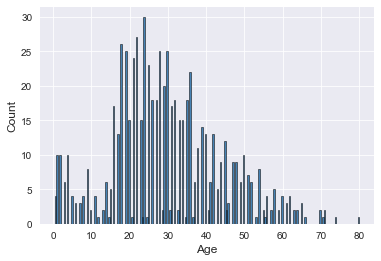

In [18]:
# histogram for Age Series 
bin_count = optimal_bins(train_data,"Age")
bin_count
# calculate optimal bins numbers and display it
plt.hist(train_data["Age"], edgecolor='black', bins=bin_count, color="steelblue")
plt.xlabel("Age")
plt.ylabel("Count")

In [19]:
# target train_data
# Survived is our target train_data

<AxesSubplot:xlabel='Survived', ylabel='count'>

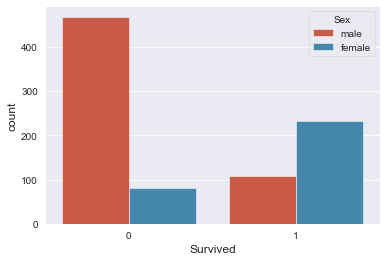

In [20]:
sns.countplot(x="Survived", data=train_data, hue="Sex")

<AxesSubplot:xlabel='Survived', ylabel='count'>

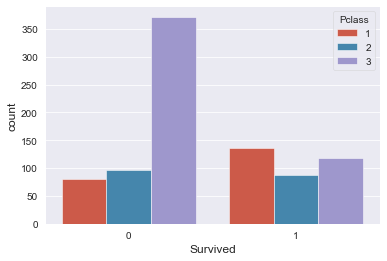

In [21]:
sns.countplot(x="Survived", data=train_data, hue="Pclass")

<AxesSubplot:xlabel='Fare'>

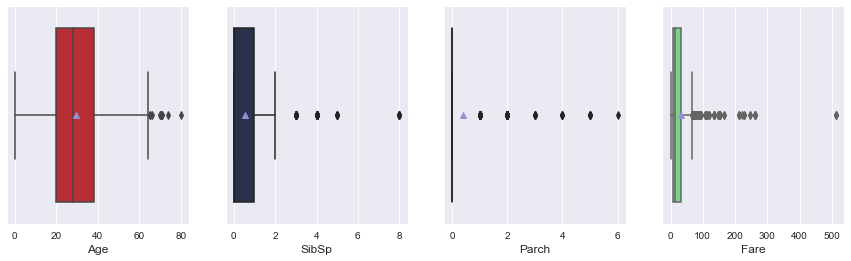

In [22]:
# show boxplot
# Create a figure and a subplots, with size of figure 15X4
# A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables
# or across levels of a categorical variable
fig, ax = plt.subplots(1, 4, figsize=(15, 4))
sns.boxplot(data=train_data, x="Age", color="#ce181f", ax=ax[0], showmeans=True)
sns.boxplot(data=train_data, x="SibSp", color="#232f51", ax=ax[1], showmeans=True)
sns.boxplot(data=train_data, x="Parch", color="#3b3742", ax=ax[2], showmeans=True)
sns.boxplot(data=train_data, x="Fare", color="#70dc88", ax=ax[3], showmeans=True)

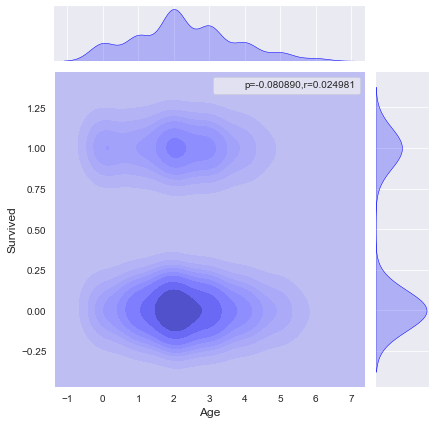

In [62]:
# Jointplot
r, p = stats.pearsonr(train_data["Age"], train_data["Survived"])
j = sns.jointplot(x="Age", y="Survived", kind="kde", fill=True,
             thresh=0, data=train_data, color="blue")
phantom, = j.ax_joint.plot([], [], linestyle="", alpha=0)
j.ax_joint.legend([phantom],["p={:f},r={:f}".format(r,p)])

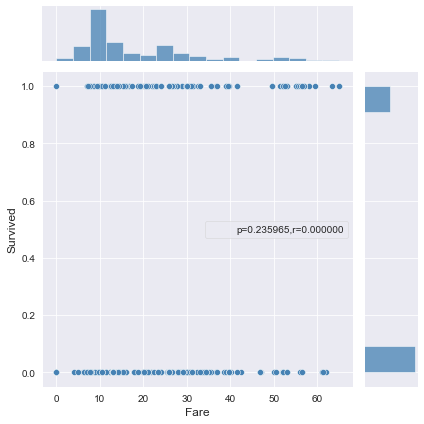

In [65]:
r, p = stats.pearsonr(train_data["Fare"], train_data["Survived"])
j = sns.jointplot(x="Fare",y="Survived",data= train_data, color='steelblue')
phantom, = j.ax_joint.plot([], [], linestyle="", alpha=0)
j.ax_joint.legend([phantom],["p={:f},r={:f}".format(r,p)])

In [23]:
# Analyze Data and Preparing  Data

In [24]:
# Correlation
corr = train_data.corr()
print(corr["Survived"].sort_values(ascending=False))


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


In [25]:
# PassengerId values
# we don't need this feature, so we go to drop this
train_data = train_data.drop("PassengerId", axis=1)
test_data = test_data.drop("PassengerId", axis=1)

In [26]:
# Name values
# we don't need this feature, so we go to drop this
train_data = train_data.drop("Name", axis=1)
test_data = test_data.drop("Name", axis=1)

In [27]:
# Sex values
# Convert from categorical to numerical
enc = OrdinalEncoder()
train_data[["Gender"]] = enc.fit_transform(train_data[["Sex"]])
test_data[["Gender"]] = enc.fit_transform(test_data[["Sex"]])
train_data = train_data.drop("Sex", axis=1)
test_data = test_data.drop("Sex", axis=1)

In [28]:
# Age values
# Fill null value
train_data["Age"] = train_data["Age"].fillna(method="ffill")
# Cast data from type float to int
train_data["Age"] = train_data["Age"].astype(int)
# Drop outliers data
outliers(train_data, "Age")
test_data["Age"] = test_data["Age"].fillna(method="ffill")
test_data["Age"] = test_data["Age"].astype(int)
outliers(test_data, "Age")

Column: Age
Old Shape (891, 10)
New Shape (883, 10)
Count of Item Removed: 8
Outliers ratio: 0.009060022650056626
Column: Age
Old Shape (418, 9)
New Shape (416, 9)
Count of Item Removed: 2
Outliers ratio: 0.004807692307692308


In [29]:
# Categorizing every age into a groups
data_set = [train_data, test_data]
for data in data_set:
    data.loc[data["Age"] <= 12, "Age"] = 0  # child passengers
    data.loc[(data["Age"] > 12) & (data["Age"] <= 20), "Age"] = 1  # teenage passengers
    data.loc[(data["Age"] > 20) & (data["Age"] <= 30), "Age"] = 2  # young passengers
    data.loc[(data["Age"] > 30) & (data["Age"] <= 40), "Age"] = 3  # man passengers
    data.loc[(data["Age"] > 40) & (data["Age"] <= 50), "Age"] = 4  # adult passengers
    data.loc[(data["Age"] > 50) & (data["Age"] <= 60), "Age"] = 5  # old passengers
    data.loc[(data["Age"] > 60), "Age"] = 6  # very old passengers

In [30]:
# check Relative between passengers and Relatives
train_data["Relatives"] = train_data["SibSp"] + train_data["Parch"]
train_data.loc[train_data["Relatives"] > 0, "not_singular"] = 0
train_data.loc[train_data["Relatives"] == 0, "not_singular"] = 1
train_data["not_singular"] = train_data["not_singular"].astype(int)

test_data["Relatives"] = test_data["SibSp"] + test_data["Parch"]
test_data.loc[test_data["Relatives"] > 0, "not_singular"] = 0
test_data.loc[test_data["Relatives"] == 0, "not_singular"] = 1
test_data["not_singular"] = test_data["not_singular"].astype(int)


In [31]:
# Ticket values
# drop this because we have many unique value
train_data = train_data.drop("Ticket", axis=1)
test_data = test_data.drop("Ticket", axis=1)

In [32]:
# Fare values
# Fill null value
train_data["Fare"] = train_data["Fare"].fillna(method="ffill")
test_data["Fare"] = test_data["Fare"].fillna(method="ffill")
# Drop outliers data
outliers(train_data, "Fare")
outliers(test_data, "Fare")

Column: Fare
Old Shape (883, 11)
New Shape (768, 11)
Count of Item Removed: 115
Outliers ratio: 0.14973958333333334
Column: Fare
Old Shape (416, 10)
New Shape (363, 10)
Count of Item Removed: 53
Outliers ratio: 0.14600550964187328


In [33]:
# Cabin values
# drop this becuse we have many null value
train_data = train_data.drop("Cabin", axis=1)
test_data = test_data.drop("Cabin", axis=1)

In [34]:
# Embarked values
# Fill null values
train_data["Embarked"] = train_data["Embarked"].fillna(method="ffill")
test_data["Embarked"] = test_data["Embarked"].fillna(method="ffill")
# Convert from categorical to numerical
enc = OrdinalEncoder()
train_data[["Embarked_encode"]] = enc.fit_transform(train_data[["Embarked"]])
test_data[["Embarked_encode"]] = enc.fit_transform(test_data[["Embarked"]])
train_data = train_data.drop("Embarked", axis=1)
test_data = test_data.drop("Embarked", axis=1)

In [35]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Relatives,not_singular,Embarked_encode
0,0,3,2,1,0,7.2500,1.0,1,0,2.0
2,1,3,2,0,0,7.9250,0.0,0,1,2.0
3,1,1,3,1,0,53.1000,0.0,1,0,2.0
4,0,3,3,0,0,8.0500,1.0,0,1,2.0
5,0,3,3,0,0,8.4583,1.0,0,1,1.0


In [36]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Gender,Relatives,not_singular,Embarked_encode
0,3,3,0,0,7.8292,1.0,0,1,1.0
1,3,4,1,0,7.0000,0.0,1,0,2.0
2,2,6,0,0,9.6875,1.0,0,1,1.0
3,3,2,0,0,8.6625,1.0,0,1,2.0
4,3,2,1,1,12.2875,0.0,2,0,2.0


In [37]:
# Building Machine Learning Models

In [38]:
# Standardization
numeric_coloumns = ["Pclass", "Age", "SibSp", "Parch",
                    "Fare", "Gender", "Relatives", "not_singular", "Embarked_encode"]
pipeline = ColumnTransformer([
    ("num", StandardScaler(), numeric_coloumns,)
])
train_data_scaled = pd.DataFrame(pipeline.fit_transform(train_data), columns=["Pclass", "Age", "SibSp", "Parch",
                                                                              "Fare", "Gender", "Relatives",
                                                                              "not_singular", "Embarked_encode"])
test_data_scaled = pd.DataFrame(pipeline.fit_transform(test_data), columns=["Pclass", "Age", "SibSp", "Parch",
                                                                            "Fare", "Gender", "Relatives",
                                                                            "not_singular", "Embarked_encode"])

In [39]:
train_y = train_data["Survived"]
train_x = train_data_scaled
test_x = test_data_scaled

In [40]:
# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(train_x, train_y)
logistic_regression_accuracy = round(logistic_regression.score(train_x, train_y) * 100, 3)

In [43]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x, train_y)
random_forest_accuracy = round(random_forest.score(train_x, train_y) * 100, 3)

In [44]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x, train_y)
knn_accuracy = round(knn.score(train_x, train_y) * 100, 3)

In [45]:
# Gaussian Naive Bayes
gaussian_naive_bayes = GaussianNB()
gaussian_naive_bayes.fit(train_x, train_y)
gaussian_naive_bayes_accuracy = round(gaussian_naive_bayes.score(train_x, train_y) * 100, 3)

In [46]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(train_x, train_y)
perceptron_accuracy = round(perceptron.score(train_x, train_y) * 100, 3)

/home/fayyad/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [47]:
# Linear Support Vector Machine:
linear_svc = LinearSVC()
linear_svc.fit(train_x, train_y)
linear_svc_accuracy = round(linear_svc.score(train_x, train_y) * 100, 3)

/home/fayyad/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [48]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)
decision_tree_accuracy = round(decision_tree.score(train_x, train_y) * 100, 3)

In [49]:
# Stochastic Gradient Descent (SGD)
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(train_x, train_y)
sgd_accuracy = round(sgd.score(train_x, train_y) * 100, 3)

In [50]:
# Display accuracy of Algorithms
Algorithms = ["Linear Support Vector Machines", "KNN", "Logistic Regression",
              "Random Forest Classifier", "Gaussian Naive Bayes", "Perceptron",
              "Stochastic Gradient Decent",
              "Decision Tree"]
Scores = [linear_svc_accuracy, knn_accuracy, logistic_regression_accuracy, random_forest_accuracy,
          gaussian_naive_bayes_accuracy, perceptron_accuracy, sgd_accuracy, decision_tree_accuracy]
Accuracy = [Algorithms, Scores]
print(tabulate(Accuracy))

------------------------------  ------  -------------------  ------------------------  --------------------  ----------  --------------------------  -------------
Linear Support Vector Machines  KNN     Logistic Regression  Random Forest Classifier  Gaussian Naive Bayes  Perceptron  Stochastic Gradient Decent  Decision Tree
79.167                          85.677  78.125               94.401                    77.604                77.344      72.005                      94.401
------------------------------  ------  -------------------  ------------------------  --------------------  ----------  --------------------------  -------------


In [51]:
# Cross Validations Random Forest Classifier
rf = RandomForestClassifier()
scores = cross_val_score(rf, train_x, train_y, cv=10, scoring="accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.74025974 0.74025974 0.76623377 0.72727273 0.87012987 0.79220779
 0.83116883 0.77922078 0.84210526 0.82894737]
Mean: 0.7917805878332194
Standard Deviation: 0.04678099743328272


In [52]:
# Cross Validations Decision Tree
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, train_x, train_y, cv=10, scoring="accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.71428571 0.75324675 0.68831169 0.72727273 0.83116883 0.80519481
 0.84415584 0.79220779 0.78947368 0.81578947]
Mean: 0.7761107313738893
Standard Deviation: 0.049958401080165964


In [73]:
# Grid Search
param_grid = {"criterion": ["gini", "entropy"], "min_samples_leaf": [1, 5, 10, 25, 40],
              "min_samples_split": [2, 4, 10, 12, 16, 18, 24, 30],
              "n_estimators": [100, 400, 700]}

rf_g = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=42)
grid_rf = GridSearchCV(estimator=rf_g, param_grid=param_grid, n_jobs=5, cv=8)
grid_rf.fit(train_x, train_y)
print(" Results from Grid Search ")
print("\n The best estimator across ALL searched params:\n", grid_rf.best_estimator_)
print("\n The best score across ALL searched params:\n", grid_rf.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_rf.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(min_samples_split=16, oob_score=True, random_state=42)

 The best score across ALL searched params:
 0.828125

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 100}


In [77]:
# RFC with new parm
random_forest = RandomForestClassifier(min_samples_split=16, n_estimators=100, oob_score=True,
                                       random_state=42, criterion="gini", min_samples_leaf=1,
                                       max_features="auto", n_jobs=5)
random_forest.fit(train_x,train_y)
random_forest_accuracy = round(random_forest.score(train_x, train_y) * 100, 3)
random_forest_accuracy

88.021

In [78]:
# Classification Report
# Confusion Matrix
predictions = cross_val_predict(random_forest, train_x, train_y, cv=8)
print("Confusion Matrix:\n", confusion_matrix(train_y, predictions))
print("Classification Report:\n", classification_report(train_y, predictions))

Confusion Matrix:
 [[458  48]
 [ 84 178]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.87       506
           1       0.79      0.68      0.73       262

    accuracy                           0.83       768
   macro avg       0.82      0.79      0.80       768
weighted avg       0.83      0.83      0.82       768

